In [1]:
import gc
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

data_dir = Path.home() / 'Desktop/kaggle/data/lanl'
os.environ['DATA_DIR'] = str(data_dir)

In [2]:
!ls -lh $DATA_DIR/testdata | head

total 829M
-rw-rw-r-- 1 maekawa primarygroup 321K Jan  1 00:00 seg_00030f.csv
-rw-rw-r-- 1 maekawa primarygroup 322K Jan  1 00:00 seg_0012b5.csv
-rw-rw-r-- 1 maekawa primarygroup 320K Jan  1 00:00 seg_00184e.csv
-rw-rw-r-- 1 maekawa primarygroup 311K Jan  1 00:00 seg_003339.csv
-rw-rw-r-- 1 maekawa primarygroup 320K Jan  1 00:00 seg_0042cc.csv
-rw-rw-r-- 1 maekawa primarygroup 361K Jan  1 00:00 seg_004314.csv
-rw-rw-r-- 1 maekawa primarygroup 316K Jan  1 00:00 seg_004cd2.csv
-rw-rw-r-- 1 maekawa primarygroup 325K Jan  1 00:00 seg_004ee5.csv
-rw-rw-r-- 1 maekawa primarygroup 324K Jan  1 00:00 seg_004f1f.csv
ls: write error: Broken pipe


In [4]:
testdata_dir = data_dir / 'testdata'
testfiles = list(testdata_dir.iterdir())
len(testfiles)

2624

In [5]:
for testfile in testfiles:
  df = pd.read_csv(testfile)
  assert df.shape == (150000, 1)

In [6]:
def load_df(testfile):
    return pd.read_csv(testfile, dtype={'acoustic_data': np.int16})

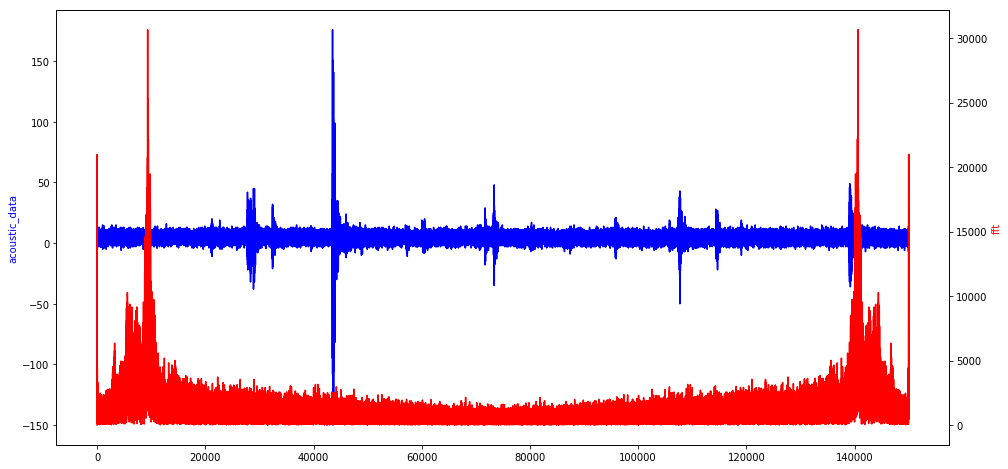

In [7]:
#from numpy.fft import fft
from scipy.fftpack import fft

def plot(df_train):
    y = df_train['acoustic_data'].values

    fig, ax1 = plt.subplots(figsize=(16, 8))
    plt.plot(y, color='b')
    ax1.set_ylabel('acoustic_data', color='b')

    ax2 = ax1.twinx()
    z = fft(y)
    z[0] = 0
    plt.plot(np.abs(z), color='r')
    ax2.set_ylabel('fft', color='r')

plot(load_df(testfiles[100]))

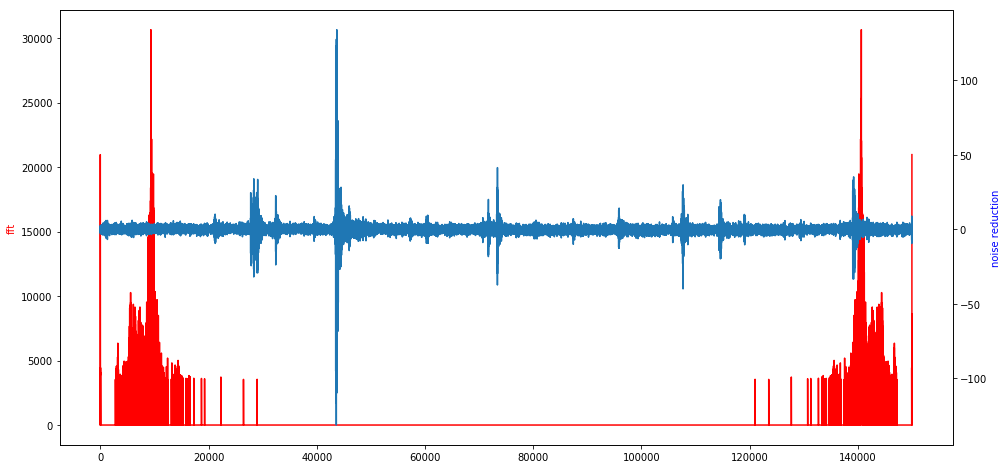

In [8]:
#from numpy.fft import fft
#from scipy.fftpack import fft

def plot(df_train):
    y = df_train['acoustic_data'].values

    fig, ax1 = plt.subplots(figsize=(16, 8))
    #plt.plot(y, color='b')

    z = np.fft.fft(y)
    z[0] = 0
    z[np.where(np.abs(z) < 3500)] = 0
    plt.plot(np.abs(z), color='r')
    ax1.set_ylabel('fft', color='r')

    ax2 = ax1.twinx()
    plt.plot(np.fft.ifft(z).real)
    ax2.set_ylabel('noise reduction', color='b')
    
plot(load_df(testfiles[100]))